# Libraries

In [11]:
import torch
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

from vanilla_rnn import RNN

# Prepare the Dataset

In [2]:
# Import the variables and functions from the other files
from static_variables import turkish_chars, VOCAB_SIZE, char_to_int, int_to_char
from utils import char_to_onehot, onehot_to_char

In [2]:
# read the txt file dataset/turkish_names_female.txt as a string
with open('dataset/turkish_names.txt', 'r') as file:
    # split the string by comma and create a list of names
    turkish_names = file.read().split(',')
    turkish_names.remove('')

In [3]:
print(turkish_names[:3])
print(len(turkish_names))

['Aba', 'Abaca', 'Abacan']
9699


In [4]:
print(min(len(name) for name in turkish_names))
print(max(len(name) for name in turkish_names))

2
12


In [3]:
turkish_chars

'ABCÇDEFGĞHIİJKLMNOÖPRSŞTUÜVYZabcçdefgğhıijklmnoöprsştuüvyz'

In [4]:
VOCAB_SIZE

60

In [5]:
# Create a dictionary that maps chars to integers and integers to chars
print(char_to_int)
print(int_to_char)

{'A': 0, 'B': 1, 'C': 2, 'Ç': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'Ğ': 8, 'H': 9, 'I': 10, 'İ': 11, 'J': 12, 'K': 13, 'L': 14, 'M': 15, 'N': 16, 'O': 17, 'Ö': 18, 'P': 19, 'R': 20, 'S': 21, 'Ş': 22, 'T': 23, 'U': 24, 'Ü': 25, 'V': 26, 'Y': 27, 'Z': 28, 'a': 29, 'b': 30, 'c': 31, 'ç': 32, 'd': 33, 'e': 34, 'f': 35, 'g': 36, 'ğ': 37, 'h': 38, 'ı': 39, 'i': 40, 'j': 41, 'k': 42, 'l': 43, 'm': 44, 'n': 45, 'o': 46, 'ö': 47, 'p': 48, 'r': 49, 's': 50, 'ş': 51, 't': 52, 'u': 53, 'ü': 54, 'v': 55, 'y': 56, 'z': 57, '<S>': 58, '<E>': 59}
{0: 'A', 1: 'B', 2: 'C', 3: 'Ç', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'Ğ', 9: 'H', 10: 'I', 11: 'İ', 12: 'J', 13: 'K', 14: 'L', 15: 'M', 16: 'N', 17: 'O', 18: 'Ö', 19: 'P', 20: 'R', 21: 'S', 22: 'Ş', 23: 'T', 24: 'U', 25: 'Ü', 26: 'V', 27: 'Y', 28: 'Z', 29: 'a', 30: 'b', 31: 'c', 32: 'ç', 33: 'd', 34: 'e', 35: 'f', 36: 'g', 37: 'ğ', 38: 'h', 39: 'ı', 40: 'i', 41: 'j', 42: 'k', 43: 'l', 44: 'm', 45: 'n', 46: 'o', 47: 'ö', 48: 'p', 49: 'r', 50: 's', 51: 'ş', 52: 't

In [6]:
char_to_onehot('B')

tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.]])

In [7]:
onehot_to_char(char_to_onehot('B'))

'B'

In [11]:
# Create train dataset for predicting the next character
dataset = []
for name in turkish_names:
    name_char_list = list(['<S>']) + list(name) + list(['<E>'])
    for i in range(1, len(name_char_list)):
        input = [char for char in name_char_list[:i]]
        output = [name_char_list[i]]
        dataset.append((input, output))

In [12]:
len(dataset)

69033

In [13]:
dataset[:10]

[(['<S>'], ['A']),
 (['<S>', 'A'], ['b']),
 (['<S>', 'A', 'b'], ['a']),
 (['<S>', 'A', 'b', 'a'], ['<E>']),
 (['<S>'], ['A']),
 (['<S>', 'A'], ['b']),
 (['<S>', 'A', 'b'], ['a']),
 (['<S>', 'A', 'b', 'a'], ['c']),
 (['<S>', 'A', 'b', 'a', 'c'], ['a']),
 (['<S>', 'A', 'b', 'a', 'c', 'a'], ['<E>'])]

# Train Test Split

In [14]:
random.shuffle(dataset)
train_dataset = dataset[:int(len(dataset) * 0.8)]
validation_dataset = dataset[int(len(dataset) * 0.8):]

In [15]:
len(train_dataset), len(validation_dataset)

(55226, 13807)

In [16]:
train_dataset[:10]

[(['<S>', 'A', 'k', 'y'], ['i']),
 (['<S>'], ['A']),
 (['<S>', 'Ü', 't'], ['ü']),
 (['<S>', 'A', 'y'], ['e']),
 (['<S>', 'G', 'ü'], ['n']),
 (['<S>', 'Ö'], ['n']),
 (['<S>', 'K', 'ı'], ['z']),
 (['<S>'], ['R']),
 (['<S>'], ['T']),
 (['<S>', 'S', 'ı', 'y', 'l', 'ı', 'k'], ['ı'])]

# Training

In [5]:
# Create the name generator model
name_generator = RNN(input_size=VOCAB_SIZE, hidden_size=32, output_size=VOCAB_SIZE)

In [6]:
name_generator

RNN(
  (i2h): Linear(in_features=92, out_features=32, bias=True)
  (i2o): Linear(in_features=32, out_features=60, bias=True)
  (tanh): Tanh()
)

In [8]:
# Check the number of parameters in the model
# Should be equal to 92*32 + 32 + 32*60 + 60 = 4956
sum(p.numel() for p in name_generator.parameters() if p.requires_grad)

4956

In [24]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(name_generator.parameters(), lr=0.0001)

In [25]:
num_epochs = 30

train_loss_logs = []
validation_loss_logs = []
for epoch in range(num_epochs):
    train_loss = 0
    for input_seq, target in tqdm(train_dataset):
        hidden = name_generator.initHidden()

        for char in input_seq:
            input_tensor = char_to_onehot(char)
            output, hidden = name_generator(input_tensor, hidden)
        
        output_tensor = char_to_onehot(target[0])

        optimizer.zero_grad()
        loss = loss_fn(output, output_tensor)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
    
    train_loss /= len(train_dataset)
    train_loss_logs.append(train_loss)

    name_generator.eval()
    validation_loss = 0
    with torch.no_grad():
        for input_seq, target in validation_dataset:
            hidden = name_generator.initHidden()

            for char in input_seq:
                input_tensor = char_to_onehot(char)
                output, hidden = name_generator(input_tensor, hidden)
            
            output_tensor = char_to_onehot(target[0])

            loss = loss_fn(output, output_tensor)
            validation_loss += loss.item()
        
    validation_loss /= len(validation_dataset)
    validation_loss_logs.append(validation_loss)

    print(f'Epoch {epoch} - Train Loss: {train_loss} | Validation Loss: {validation_loss}')

100%|██████████| 55226/55226 [00:48<00:00, 1140.74it/s]


Epoch 0 - Train Loss: 2.800434034468697 | Validation Loss: 2.5394477526939707


100%|██████████| 55226/55226 [00:46<00:00, 1191.15it/s]


Epoch 1 - Train Loss: 2.4555649142026335 | Validation Loss: 2.389895345271821


100%|██████████| 55226/55226 [00:52<00:00, 1059.02it/s]


Epoch 2 - Train Loss: 2.3571518038914574 | Validation Loss: 2.328321573244165


100%|██████████| 55226/55226 [00:49<00:00, 1119.32it/s]


Epoch 3 - Train Loss: 2.3062084934104914 | Validation Loss: 2.2882893225606447


100%|██████████| 55226/55226 [00:47<00:00, 1168.49it/s]


Epoch 4 - Train Loss: 2.270452709994557 | Validation Loss: 2.2592703712946425


100%|██████████| 55226/55226 [00:46<00:00, 1182.24it/s]


Epoch 5 - Train Loss: 2.244748570840098 | Validation Loss: 2.2388800387159113


100%|██████████| 55226/55226 [00:47<00:00, 1169.06it/s]


Epoch 6 - Train Loss: 2.2249859384798456 | Validation Loss: 2.2223553287818194


100%|██████████| 55226/55226 [00:48<00:00, 1137.74it/s]


Epoch 7 - Train Loss: 2.2082150478786313 | Validation Loss: 2.208810341115651


100%|██████████| 55226/55226 [00:47<00:00, 1164.78it/s]


Epoch 8 - Train Loss: 2.1942572000346128 | Validation Loss: 2.1976175485364324


100%|██████████| 55226/55226 [00:47<00:00, 1169.44it/s]


Epoch 9 - Train Loss: 2.1822717641281106 | Validation Loss: 2.188255127746888


100%|██████████| 55226/55226 [00:46<00:00, 1177.57it/s]


Epoch 10 - Train Loss: 2.171831992792205 | Validation Loss: 2.1802877555610407


100%|██████████| 55226/55226 [00:49<00:00, 1114.56it/s]


Epoch 11 - Train Loss: 2.16249853421307 | Validation Loss: 2.1730093276259708


100%|██████████| 55226/55226 [00:46<00:00, 1178.58it/s]


Epoch 12 - Train Loss: 2.153686543164486 | Validation Loss: 2.1670164231174116


100%|██████████| 55226/55226 [00:47<00:00, 1169.65it/s]


Epoch 13 - Train Loss: 2.146611919991409 | Validation Loss: 2.162116879354813


100%|██████████| 55226/55226 [00:47<00:00, 1162.22it/s]


Epoch 14 - Train Loss: 2.14038384947827 | Validation Loss: 2.1578311747173538


100%|██████████| 55226/55226 [00:48<00:00, 1132.43it/s]


Epoch 15 - Train Loss: 2.1347656145593756 | Validation Loss: 2.1539874136585646


100%|██████████| 55226/55226 [00:46<00:00, 1175.91it/s]


Epoch 16 - Train Loss: 2.129621151465796 | Validation Loss: 2.1505402931402564


100%|██████████| 55226/55226 [00:47<00:00, 1163.62it/s]


Epoch 17 - Train Loss: 2.1248852245750305 | Validation Loss: 2.1474178741155394


100%|██████████| 55226/55226 [00:49<00:00, 1126.95it/s]


Epoch 18 - Train Loss: 2.120609659546894 | Validation Loss: 2.144676586903916


100%|██████████| 55226/55226 [00:47<00:00, 1174.06it/s]


Epoch 19 - Train Loss: 2.116674950916669 | Validation Loss: 2.1421683377629406


100%|██████████| 55226/55226 [00:46<00:00, 1175.87it/s]


Epoch 20 - Train Loss: 2.1130102162464874 | Validation Loss: 2.1398615150870204


100%|██████████| 55226/55226 [00:47<00:00, 1169.07it/s]


Epoch 21 - Train Loss: 2.109581790835428 | Validation Loss: 2.137726200201514


100%|██████████| 55226/55226 [00:47<00:00, 1159.04it/s]


Epoch 22 - Train Loss: 2.1063274428241088 | Validation Loss: 2.1357059251117603


100%|██████████| 55226/55226 [00:46<00:00, 1178.98it/s]


Epoch 23 - Train Loss: 2.1032113079440586 | Validation Loss: 2.1337748180561946


100%|██████████| 55226/55226 [00:48<00:00, 1149.08it/s]


Epoch 24 - Train Loss: 2.1002108057733055 | Validation Loss: 2.1319199902055206


100%|██████████| 55226/55226 [00:48<00:00, 1138.21it/s]


Epoch 25 - Train Loss: 2.0973066424490523 | Validation Loss: 2.130128538763504


100%|██████████| 55226/55226 [00:47<00:00, 1162.18it/s]


Epoch 26 - Train Loss: 2.0944441324327223 | Validation Loss: 2.128316831906172


100%|██████████| 55226/55226 [00:48<00:00, 1148.48it/s]


Epoch 27 - Train Loss: 2.091604994342525 | Validation Loss: 2.1266771651968157


100%|██████████| 55226/55226 [00:48<00:00, 1146.54it/s]


Epoch 28 - Train Loss: 2.088984887671456 | Validation Loss: 2.1251104186897303


100%|██████████| 55226/55226 [00:47<00:00, 1158.66it/s]


Epoch 29 - Train Loss: 2.0864172552522073 | Validation Loss: 2.1235100663648656


In [86]:
num_extra_epochs = 20

for epoch in range(num_epochs, num_epochs+num_extra_epochs):
    train_loss = 0
    for input_seq, target in tqdm(train_dataset):
        hidden = name_generator.initHidden()

        for char in input_seq:
            input_tensor = char_to_onehot(char)
            output, hidden = name_generator(input_tensor, hidden)
        
        output_tensor = char_to_onehot(target[0])

        optimizer.zero_grad()
        loss = loss_fn(output, output_tensor)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
    
    train_loss /= len(train_dataset)
    train_loss_logs.append(train_loss)

    name_generator.eval()
    validation_loss = 0
    with torch.no_grad():
        for input_seq, target in validation_dataset:
            hidden = name_generator.initHidden()

            for char in input_seq:
                input_tensor = char_to_onehot(char)
                output, hidden = name_generator(input_tensor, hidden)
            
            output_tensor = char_to_onehot(target[0])

            loss = loss_fn(output, output_tensor)
            validation_loss += loss.item()
        
    validation_loss /= len(validation_dataset)
    validation_loss_logs.append(validation_loss)

    print(f'Epoch {epoch} - Train Loss: {train_loss} | Validation Loss: {validation_loss}')

100%|██████████| 55226/55226 [00:45<00:00, 1215.56it/s]


Epoch 30 - Train Loss: 2.083955125021302 | Validation Loss: 2.122148131438339


100%|██████████| 55226/55226 [00:46<00:00, 1188.90it/s]


Epoch 31 - Train Loss: 2.081701072383775 | Validation Loss: 2.120925845539123


100%|██████████| 55226/55226 [00:45<00:00, 1215.59it/s]


Epoch 32 - Train Loss: 2.07955305276254 | Validation Loss: 2.1197994421874657


100%|██████████| 55226/55226 [00:45<00:00, 1219.16it/s]


Epoch 33 - Train Loss: 2.077485262567302 | Validation Loss: 2.1187519351631376


100%|██████████| 55226/55226 [00:45<00:00, 1225.49it/s]


Epoch 34 - Train Loss: 2.0754947305172773 | Validation Loss: 2.1177785723287554


100%|██████████| 55226/55226 [00:45<00:00, 1217.83it/s]


Epoch 35 - Train Loss: 2.073586748889085 | Validation Loss: 2.1168699060909923


100%|██████████| 55226/55226 [00:46<00:00, 1199.17it/s]


Epoch 36 - Train Loss: 2.07175566056429 | Validation Loss: 2.116013075312137


100%|██████████| 55226/55226 [00:49<00:00, 1107.90it/s]


Epoch 37 - Train Loss: 2.0699916605550652 | Validation Loss: 2.1151980307415448


100%|██████████| 55226/55226 [00:47<00:00, 1168.07it/s]


Epoch 38 - Train Loss: 2.0682815802222705 | Validation Loss: 2.11441043714296


100%|██████████| 55226/55226 [00:47<00:00, 1173.71it/s]


Epoch 39 - Train Loss: 2.0666326906731243 | Validation Loss: 2.1136739102384867


100%|██████████| 55226/55226 [00:48<00:00, 1147.46it/s]


Epoch 40 - Train Loss: 2.065057124210178 | Validation Loss: 2.1129685845904964


100%|██████████| 55226/55226 [00:47<00:00, 1169.33it/s]


Epoch 41 - Train Loss: 2.0635340911448066 | Validation Loss: 2.1122856244474257


100%|██████████| 55226/55226 [00:51<00:00, 1079.73it/s]


Epoch 42 - Train Loss: 2.062058298963311 | Validation Loss: 2.111626149905748


100%|██████████| 55226/55226 [00:48<00:00, 1149.54it/s]


Epoch 43 - Train Loss: 2.0606348286673417 | Validation Loss: 2.110996355222228


100%|██████████| 55226/55226 [00:49<00:00, 1119.75it/s]


Epoch 44 - Train Loss: 2.059248895915203 | Validation Loss: 2.110387029819298


100%|██████████| 55226/55226 [00:47<00:00, 1153.92it/s]


Epoch 45 - Train Loss: 2.057894879399217 | Validation Loss: 2.1097947595338287


100%|██████████| 55226/55226 [00:47<00:00, 1154.81it/s]


Epoch 46 - Train Loss: 2.0565706783420805 | Validation Loss: 2.1092174566104203


100%|██████████| 55226/55226 [00:47<00:00, 1155.35it/s]


Epoch 47 - Train Loss: 2.0552743954953203 | Validation Loss: 2.1086544269738576


100%|██████████| 55226/55226 [00:46<00:00, 1176.07it/s]


Epoch 48 - Train Loss: 2.0540048561771655 | Validation Loss: 2.1081059652657137


100%|██████████| 55226/55226 [00:48<00:00, 1140.86it/s]


Epoch 49 - Train Loss: 2.0527613365227273 | Validation Loss: 2.107573505877389


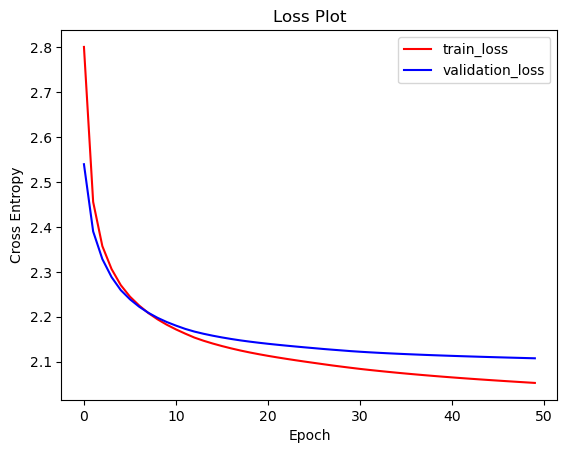

In [87]:
plt.plot(train_loss_logs, color='red', label='train_loss')
plt.plot(validation_loss_logs, color='blue', label='validation_loss')

plt.title("Loss Plot")
plt.xlabel("Epoch")
plt.ylabel("Cross Entropy")
plt.legend()
plt.show()

# Inference

In [8]:
from utils import generate_name

In [161]:
generate_name(name_generator, temperature=0.5)

'Barkan'

# Save the model

In [ ]:
# Save the pytorch rnn model
torch.save(name_generator, 'rnn_turkish_name_generator.pth')

In [12]:
rnn_turkish_name_generator = torch.load('rnn_turkish_name_generator.pth')

In [14]:
for i in range(20):
    print(generate_name(rnn_turkish_name_generator, temperature=0.5))

Ayalan
Billü
Ergen
Gülen
Abdülhan
Aytan
Güncan
Berkal
Günsel
Sala
Kayaman
Sara
Sunak
Tekiye
Urukay
Arak
Ergin
Seven
Berkan
Nursan
